In [224]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template)

In [10]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5',
       'MTHCMP6', 'FTFTPCTPELL_POOLED_SUPP', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=602)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [27]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [28]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [29]:
cost_df = cost_df.fillna(0)

In [30]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [31]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [32]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [33]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [34]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [35]:
cost_clean_df = cost_df.copy()

In [36]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [37]:
x


[59430.0,
 58230.0,
 56960.0,
 56910.0,
 56778.0,
 56620.0,
 56550.0,
 56426.0,
 56382.0,
 56340.0,
 56225.0,
 56092.0,
 55930.0,
 55900.0,
 55870.0,
 55695.0,
 55584.0,
 55470.0,
 55466.0,
 55465.0,
 55464.0,
 55453.0,
 55450.0,
 55395.0,
 55290.0,
 55255.0,
 55230.0,
 55210.0,
 55188.0,
 55052.0,
 55032.0,
 55024.0,
 54944.0,
 54846.0,
 54838.0,
 54820.0,
 54820.0,
 54759.0,
 54686.0,
 54680.0,
 54661.0,
 54620.0,
 54568.0,
 54492.0,
 54480.0,
 54450.0,
 54420.0,
 54405.0,
 54344.0,
 54118.0,
 54104.0,
 54056.0,
 53948.0,
 53932.0,
 53922.0,
 53909.0,
 53880.0,
 53860.0,
 53794.0,
 53740.0,
 53736.0,
 53732.0,
 53630.0,
 53430.0,
 53399.0,
 53391.0,
 53343.0,
 53322.0,
 53308.0,
 53244.0,
 52930.0,
 52780.0,
 52770.0,
 52764.0,
 52724.0,
 52687.0,
 52626.0,
 52610.0,
 52595.0,
 52588.0,
 52455.0,
 52404.0,
 52392.0,
 52362.0,
 52360.0,
 52202.0,
 52050.0,
 51960.0,
 51870.0,
 51853.0,
 51832.0,
 51828.0,
 51711.0,
 51668.0,
 51522.0,
 51447.0,
 51354.0,
 51306.0,
 51104.0,
 50960.0,


In [38]:
y1

[13200,
 11900,
 9000,
 13500,
 0,
 14900,
 10600,
 9200,
 18500,
 4600,
 13500,
 18400,
 10000,
 4800,
 13100,
 19700,
 23500,
 7600,
 10500,
 14600,
 21300,
 15600,
 7100,
 7000,
 10300,
 8000,
 15500,
 10600,
 14900,
 6300,
 8100,
 6400,
 8500,
 10000,
 8400,
 10300,
 10100,
 9100,
 7900,
 4400,
 9800,
 11000,
 15200,
 12100,
 12200,
 14000,
 6700,
 14600,
 8500,
 4600,
 23300,
 5900,
 14200,
 13400,
 11600,
 11400,
 23600,
 5000,
 13100,
 16900,
 0,
 12600,
 16400,
 14000,
 12600,
 21400,
 6700,
 13000,
 20300,
 15300,
 20100,
 5200,
 18800,
 4600,
 9700,
 9500,
 11100,
 14800,
 11400,
 5100,
 17300,
 8900,
 6100,
 0,
 10300,
 19000,
 9700,
 6500,
 6700,
 13000,
 19400,
 8300,
 12700,
 3700,
 15700,
 14400,
 18700,
 12900,
 24300,
 5200,
 5200,
 11700,
 20800,
 16500,
 18800,
 6800,
 9900,
 6900,
 10100,
 0,
 4500,
 9600,
 26200,
 22700,
 12700,
 10500,
 7200,
 11300,
 10200,
 11000,
 19500,
 10200,
 5600,
 4300,
 6300,
 6300,
 19100,
 17200,
 5700,
 6800,
 6700,
 10200,
 11600,
 2

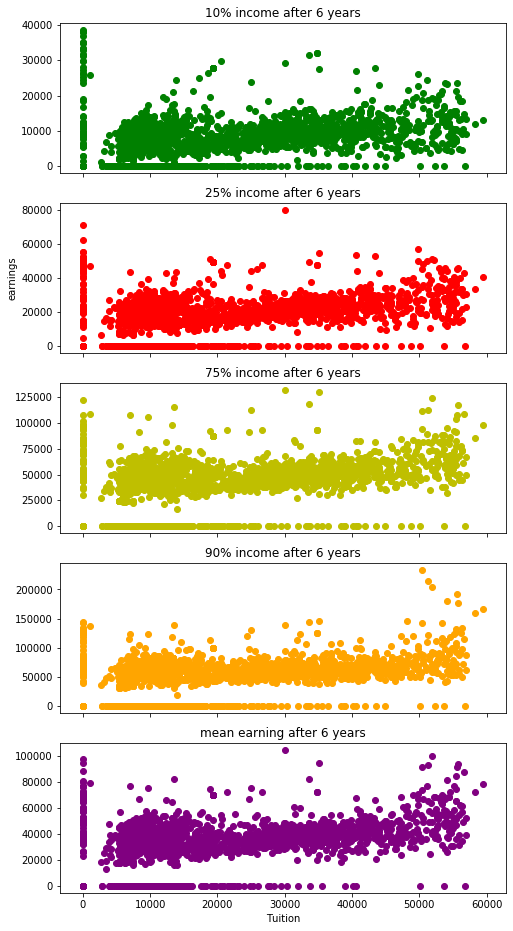

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [40]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300


In [41]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [42]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,2058.000000,2058.000000,2058.000000
mean,2507.677357,21140.330904,24318.506317
std,1567.057753,14867.713737,13712.741397
min,0.000000,0.000000,0.000000
25%,1267.250000,8979.500000,14604.500000
50%,2345.500000,16540.500000,22425.000000
75%,3467.750000,32007.500000,33283.500000
max,6322.000000,59430.000000,59430.000000


In [43]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7619,0.4048,42.0


In [44]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7619,0.4048,42.0


Begin random forest regession.

In [45]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
377,earnings,PCT10_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
378,earnings,PCT10_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
379,earnings,PCT10_EARN_WNE_P8,8_yrs_after_entry.10th_percentile_earnings,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
380,earnings,PCT25_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
381,earnings,PCT25_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
...,...,...,...,...,...,...,...,...,...
447,earnings,SD_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
448,earnings,SD_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
449,earnings,SD_EARN_WNE_P7,7_yrs_after_entry.std_dev,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
450,earnings,SD_EARN_WNE_P8,8_yrs_after_entry.std_deviation,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)


In [46]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [47]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [48]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [49]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [50]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [51]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [52]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5732,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8607,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3319,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6981,0.7745,9022.0


In [53]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [54]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [158]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

KeyError: 'MN_EARN_WNE_P6'

In [56]:
from pandas.api.types import is_numeric_dtype

In [57]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [58]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [59]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [60]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [61]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [62]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [63]:
len(column_list)

519

In [64]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [65]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [66]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [67]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.5614213198
0.5854037267
0.5794155019
0.6469730124
0.5834216663
0.7410714286
0.5510204082
0.6237288136
0.5183673469
0.4321223709
0.6662672259
0.4298169137
0.6448467967
0.5898234683
0.7476099426
0.6321070234
0.5051851852
0.6526315789
0.6019404019
0.5808518658
0.5427435388
0.5758293839
0.592864638
0.6201022147
0.5809781273
0.5301943394
0.6175869121
0.6611524676
0.5007582651
0.675904542
0.5021321962
0.7127659574
0.5281124498
0.6118200134
0.5607034156
0.3643410853
0.4632142857
0.5053304904
0.6033829841
0.6484230056
0.6254948535
0.6104868914
0.523255814
0.5697445972
0.4719800747
0.6505125815
0.631394534
0.7628668652
0.5303797468
0.6459016393
0.6814381271
0.6537602383
0.6554726368
0.5257100149
0.3906705539
0.5871559633
0.6407207207
0.5162790698
0.653966831
0.6114854026
0.5167714885
0.6372430472
0.6331224842
0.4303977273
0.5839070568
0.5485318429
0.6926713948
0.5758743754
0.5644820296
0.6100395073
0.4518167457
0.6216216216
0.7171052632
0.6614142466
0.6041358936
0.5690168818
0.5095367847
0.49

In [68]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

248 WDRAW_ORIG_YR2_RT
249 LO_INC_DEATH_YR4_RT
250 LO_INC_COMP_ORIG_YR4_RT
251 LO_INC_COMP_4YR_TRANS_YR4_RT
252 LO_INC_COMP_2YR_TRANS_YR4_RT
253 LO_INC_WDRAW_ORIG_YR4_RT
254 LO_INC_WDRAW_4YR_TRANS_YR4_RT
255 LO_INC_WDRAW_2YR_TRANS_YR4_RT
256 LO_INC_ENRL_ORIG_YR4_RT
257 LO_INC_ENRL_4YR_TRANS_YR4_RT
258 LO_INC_ENRL_2YR_TRANS_YR4_RT
259 LO_INC_UNKN_ORIG_YR4_RT
260 LO_INC_UNKN_4YR_TRANS_YR4_RT
261 LO_INC_UNKN_2YR_TRANS_YR4_RT
262 MD_INC_DEATH_YR4_RT
263 MD_INC_COMP_ORIG_YR4_RT
264 MD_INC_COMP_4YR_TRANS_YR4_RT
265 MD_INC_COMP_2YR_TRANS_YR4_RT
266 MD_INC_WDRAW_ORIG_YR4_RT
267 MD_INC_WDRAW_4YR_TRANS_YR4_RT
268 MD_INC_WDRAW_2YR_TRANS_YR4_RT
269 MD_INC_ENRL_ORIG_YR4_RT
270 MD_INC_ENRL_4YR_TRANS_YR4_RT
271 MD_INC_ENRL_2YR_TRANS_YR4_RT
272 MD_INC_UNKN_ORIG_YR4_RT
273 MD_INC_UNKN_4YR_TRANS_YR4_RT
275 HI_INC_DEATH_YR4_RT
276 HI_INC_COMP_ORIG_YR4_RT
277 HI_INC_COMP_4YR_TRANS_YR4_RT
278 HI_INC_COMP_2YR_TRANS_YR4_RT
279 HI_INC_WDRAW_ORIG_YR4_RT
280 HI_INC_WDRAW_4YR_TRANS_YR4_RT
281 HI_INC_WDRAW_2YR_TRA

In [69]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [160]:
X = filtered_4_year_df
X_base_line = X

In [71]:
print(X.shape, y.shape)

(1826, 519) (1826,)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [74]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7813033327638237

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.97674187e-06, 6.78597358e-05, 5.13533421e-04, 0.00000000e+00,
       5.01201886e-04, 6.17751375e-04, 4.93363280e-04, 4.51358471e-04,
       0.00000000e+00, 9.48675439e-04, 1.10765375e-03, 2.43485723e-03,
       1.73349914e-04, 4.38041914e-04, 3.56251277e-07, 5.18864150e-07,
       2.08682119e-03, 1.13304246e-02, 8.89140999e-04, 2.13510380e-04,
       1.84460177e-03, 4.21284395e-04, 3.89439929e-04, 2.03309725e-04,
       4.20698782e-04, 2.33427349e-03, 4.37671953e-04, 3.09734626e-04,
       1.01040343e-03, 3.57515046e-04, 3.59115448e-04, 6.56985660e-04,
       5.85332101e-04, 2.92090711e-04, 8.84655465e-06, 6.38989360e-04,
       8.42157760e-04, 6.08631611e-04, 1.60677688e-04, 1.94845975e-03,
       4.28387687e-03, 1.88244208e-05, 3.45604777e-04, 8.50414860e-05,
       4.77165885e-04, 4.94966899e-04, 3.34197214e-05, 1.77166464e-03,
       7.44711527e-06, 3.05825263e-03, 6.31693629e-03, 8.89951940e-05,
       3.83303811e-04, 9.96970388e-05, 8.14571981e-05, 6.86717125e-04,
      

In [76]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.13566939839391318, 'RPY_3YR_RT'),
 (0.08866577011972243, 'WDRAW_ORIG_YR2_RT'),
 (0.05277056760623293, 'FAMINC_IND'),
 (0.0412397512980792, 'UGDS_ASIAN'),
 (0.029957932183273365, 'LO_INC_RPY_1YR_RT'),
 (0.028527671013718916, 'AVGFACSAL'),
 (0.026671705226257177, 'PCIP51'),
 (0.026492525719736544, 'RPY_1YR_RT'),
 (0.01784645493190412, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.015855384350257504, 'DEP_RPY_3YR_RT'),
 (0.013580763827324161, 'IND_RPY_3YR_RT'),
 (0.012352529132389831, 'DEP_RPY_5YR_RT'),
 (0.012274916498363965, 'INEXPFTE'),
 (0.012005767794569572, 'AGEGE24'),
 (0.011880806049524172, 'IND_RPY_7YR_RT'),
 (0.011739641317164248, 'FIRSTGEN_RPY_7YR_RT'),
 (0.011330424644021033, 'ADM_RATE_ALL'),
 (0.011141039112180196, 'HI_INC_RPY_7YR_RT'),
 (0.010063540887757091, 'IND_RPY_5YR_RT'),
 (0.01000419106774001, 'PCIP50'),
 (0.009990766331450667, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.009860078484165025, 'FIRSTGEN_RPY_1YR_RT'),
 (0.009422285436592648, 'DEP_RPY_1YR_RT'),
 (0.008564069526382445, 'AGE_ENT

In [77]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [78]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [79]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [80]:
X = filtered_4_year_a_df

In [81]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [82]:
print(X.shape, y.shape)

(1826, 463) (1826,)


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [84]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8204595781454084

In [85]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([2.08391184e-05, 2.82256541e-05, 1.97601462e-04, 0.00000000e+00,
       3.78063020e-04, 6.11677124e-04, 5.55462927e-04, 6.52127664e-04,
       0.00000000e+00, 1.51306651e-03, 2.16968079e-03, 1.68114655e-03,
       3.62423215e-04, 1.59062974e-03, 2.85646926e-06, 2.09090239e-05,
       3.11838759e-03, 3.05832052e-03, 2.59537472e-04, 2.62668188e-04,
       2.63367304e-03, 1.39038534e-03, 4.85899856e-04, 4.10561310e-04,
       9.18676640e-04, 3.91248250e-03, 1.14914074e-03, 1.86688951e-04,
       1.45987628e-03, 4.22977746e-04, 2.80713801e-04, 1.16170007e-03,
       1.29014740e-03, 3.98409690e-05, 7.80764830e-05, 3.42515578e-04,
       9.06132919e-05, 1.21645562e-03, 2.89901373e-05, 5.61032980e-04,
       2.92258623e-03, 2.86707476e-05, 5.80324781e-04, 1.65948650e-04,
       5.83654567e-04, 7.37087631e-04, 1.12153561e-04, 2.83494663e-03,
       1.15797516e-05, 2.46009809e-03, 1.61449570e-02, 8.52019961e-04,
       6.33861327e-04, 2.36049428e-04, 1.89871796e-04, 1.20236605e-03,
      

In [86]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2118643832040245, 'WDRAW_ORIG_YR2_RT'),
 (0.07504754465204701, 'FAMINC_IND'),
 (0.07061095535564914, 'UGDS_ASIAN'),
 (0.06962730755870421, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.05467134868022003, 'AVGFACSAL'),
 (0.042696156429117, 'PCIP51'),
 (0.030111051451130418, 'INEXPFTE'),
 (0.023277523249048273, 'PCIP50'),
 (0.022119962437984707, 'TUITFTE'),
 (0.016144957023145612, 'PCIP14'),
 (0.013877743091488938, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.012736770135342497, 'HI_INC_DEBT_N'),
 (0.012578951392850275, 'HI_INC_YR4_N'),
 (0.009029988585042817, 'UGDS_WHITE'),
 (0.006605666202502381, 'PELL_EVER'),
 (0.005991974109547777, 'NOPELL_YR6_N'),
 (0.005574850002832057, 'NOPELL_DEBT_N'),
 (0.005505130476789866, 'PCTFLOAN'),
 (0.004763270414220737, 'INC_PCT_M2'),
 (0.004499027280845522, 'FEMALE'),
 (0.004316028043222825, 'PCIP49'),
 (0.004284498516461098, 'DEPENDENT'),
 (0.0041574463105680136, 'FAMINC'),
 (0.003968318069276274, 'AGE_ENTRY'),
 (0.003912482499758933, 'SATMTMID'),
 (0.0038251560524145936, 'F

In [87]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2118643832040245, 'WDRAW_ORIG_YR2_RT')
(0.07504754465204701, 'FAMINC_IND')
(0.07061095535564914, 'UGDS_ASIAN')
(0.06962730755870421, 'FTFTPCTPELL_POOLED_SUPP')
(0.05467134868022003, 'AVGFACSAL')
(0.042696156429117, 'PCIP51')
(0.030111051451130418, 'INEXPFTE')
(0.023277523249048273, 'PCIP50')
(0.022119962437984707, 'TUITFTE')
(0.016144957023145612, 'PCIP14')
(0.013877743091488938, 'LO_INC_COMP_ORIG_YR4_RT')
(0.012736770135342497, 'HI_INC_DEBT_N')
(0.012578951392850275, 'HI_INC_YR4_N')
(0.009029988585042817, 'UGDS_WHITE')
(0.006605666202502381, 'PELL_EVER')
(0.005991974109547777, 'NOPELL_YR6_N')
(0.005574850002832057, 'NOPELL_DEBT_N')
(0.005505130476789866, 'PCTFLOAN')
(0.004763270414220737, 'INC_PCT_M2')
(0.004499027280845522, 'FEMALE')
(0.004316028043222825, 'PCIP49')
(0.004284498516461098, 'DEPENDENT')
(0.0041574463105680136, 'FAMINC')
(0.003968318069276274, 'AGE_ENTRY')
(0.003912482499758933, 'SATMTMID')
(0.0038251560524145936, 'FIRSTGEN_DEBT_N')
(0.003785450063737688, 'HI_INC_COM

In [88]:
a_drop_list

['CIP15BACHL',
 'MD_INC_UNKN_ORIG_YR4_RT',
 'CIP03BACHL',
 'CIP40BACHL',
 'CIP49BACHL',
 'CIP39BACHL',
 'ACTENMID',
 'NPT45_PUB',
 'MD_INC_ENRL_ORIG_YR6_RT',
 'CIP13BACHL',
 'CIP26BACHL',
 'CIP31BACHL',
 'NPT44_PUB',
 'ACTWR75',
 'HI_INC_ENRL_ORIG_YR6_RT',
 'CIP45BACHL',
 'NPT4_3075_PUB',
 'NPT4_75UP_PUB',
 'NPT43_PUB',
 'PCIP29',
 'CIP24BACHL',
 'NPT41_PUB',
 'CIP22BACHL',
 'CIP38BACHL',
 'NUM44_PUB',
 'CIP30BACHL',
 'NUM43_PUB',
 'ACTWR25',
 'LO_INC_DEATH_YR4_RT',
 'CIP27BACHL',
 'CIP16BACHL',
 'ACTWRMID',
 'CIP41BACHL',
 'PCIP01',
 'MAIN',
 'NUM4_PUB',
 'HI_INC_ENRL_2YR_TRANS_YR4_RT',
 'HI_INC_UNKN_ORIG_YR4_RT',
 'CIP10BACHL',
 'CIP05BACHL',
 'WOMENONLY',
 'SCH_DEG',
 'MD_INC_ENRL_2YR_TRANS_YR6_RT',
 'MD_INC_ENRL_2YR_TRANS_YR4_RT',
 'CIP04BACHL',
 'LO_INC_UNKN_4YR_TRANS_YR6_RT',
 'HI_INC_ENRL_2YR_TRANS_YR6_RT',
 'LO_INC_DEATH_YR6_RT',
 'PCIP12',
 'PCIP47',
 'CIP29BACHL',
 'CIP01BACHL',
 'DISTANCEONLY',
 'LO_INC_UNKN_4YR_TRANS_YR4_RT',
 'LO_INC_UNKN_ORIG_YR4_RT',
 'MENONLY',
 'PCIP48

In [89]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [90]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,...,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,SCHTYPE,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,...,14.8800001144409,4.84000015258789,10.75,15000,34500,358.051635276573,1.0,0.7083,0.7287,2698.0
1,1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,...,10.9099998474121,3.45000004768371,10.8599996566772,15000,22500,233.511936049938,1.0,0.3891,0.5414,4176.0
2,1,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,...,10.6499996185302,3.59999990463256,10.8400001525878,13207,25002,259.478463338692,2.0,0,0,24.0
3,1,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,...,9.36999988555908,3.64000010490417,10.9300003051757,14000,22021,228.540726389142,1.0,0.2378,0.4402,2544.0
4,1,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,...,16.9599990844726,4.80999994277954,10.6700000762939,18950,32637,338.716846971638,1.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,0.0,0,0,5.0
5912,19,3,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,3.0,0.8824,0.9412,34.0
5914,4,3,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,...,0,0,0,3667,4225,43.848352436044,3.0,0.9746,0.4915,118.0
5918,1,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,...,0,0,0,10868,12500,129.728853361077,1.0,0.6975,0.1793,552.0


In [91]:
X = filtered_4_year_b_df

In [92]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [93]:
print(X.shape, y.shape)

(1826, 273) (1826,)


In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [95]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8199160347310936

In [96]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.18532045628054847, 'WDRAW_ORIG_YR2_RT'),
 (0.0823052880031518, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.07968877358624703, 'UGDS_ASIAN'),
 (0.06713822023280049, 'FAMINC_IND'),
 (0.05218951758528764, 'AVGFACSAL'),
 (0.03949826861793834, 'PCIP51'),
 (0.032579678358553875, 'INEXPFTE'),
 (0.028219251352042805, 'PCIP50'),
 (0.025713078615273006, 'TUITFTE'),
 (0.015013421869638438, 'PCIP14'),
 (0.014092759424897839, 'HI_INC_DEBT_N'),
 (0.010657236275622048, 'HI_INC_YR4_N'),
 (0.009654982328011628, 'NOPELL_DEBT_N'),
 (0.009256223816466888, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.007240981369237388, 'PELL_EVER'),
 (0.005741542723015446, 'C150_4_WHITE'),
 (0.005546584060662052, 'SAT_AVG_ALL'),
 (0.0053158384909542, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.005117880512596996, 'UGDS_WHITE'),
 (0.00511630841169075, 'FEMALE'),
 (0.004890699357179466, 'INC_PCT_M2'),
 (0.004720331928657087, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.004675458158390083, 'NOPELL_YR6_N'),
 (0.004641361521542317, 'MD_INC_COMP_ORIG_YR4_RT'),
 (0.0044138

In [97]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.18532045628054847, 'WDRAW_ORIG_YR2_RT')
(0.0823052880031518, 'FTFTPCTPELL_POOLED_SUPP')
(0.07968877358624703, 'UGDS_ASIAN')
(0.06713822023280049, 'FAMINC_IND')
(0.05218951758528764, 'AVGFACSAL')
(0.03949826861793834, 'PCIP51')
(0.032579678358553875, 'INEXPFTE')
(0.028219251352042805, 'PCIP50')
(0.025713078615273006, 'TUITFTE')
(0.015013421869638438, 'PCIP14')
(0.014092759424897839, 'HI_INC_DEBT_N')
(0.010657236275622048, 'HI_INC_YR4_N')
(0.009654982328011628, 'NOPELL_DEBT_N')
(0.009256223816466888, 'LO_INC_COMP_ORIG_YR4_RT')
(0.007240981369237388, 'PELL_EVER')
(0.005741542723015446, 'C150_4_WHITE')
(0.005546584060662052, 'SAT_AVG_ALL')
(0.0053158384909542, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.005117880512596996, 'UGDS_WHITE')
(0.00511630841169075, 'FEMALE')
(0.004890699357179466, 'INC_PCT_M2')
(0.004720331928657087, 'LO_INC_COMP_ORIG_YR6_RT')
(0.004675458158390083, 'NOPELL_YR6_N')
(0.004641361521542317, 'MD_INC_COMP_ORIG_YR4_RT')
(0.0044138757445039995, 'AGEGE24')
(0.004413251095214368, '

In [98]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [99]:
X = filtered_4_year_c_df

In [100]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [101]:
print(X.shape, y.shape)

(1826, 130) (1826,)


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [103]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8234668771361588

In [104]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.22242022738679512, 'WDRAW_ORIG_YR2_RT'),
 (0.07519420258625174, 'FAMINC_IND'),
 (0.0625623076124625, 'AVGFACSAL'),
 (0.052986328260362064, 'UGDS_ASIAN'),
 (0.05041129886599731, 'PCIP51'),
 (0.04898810831851913, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.028294034650229536, 'INEXPFTE'),
 (0.025968847827639484, 'PCIP50'),
 (0.025938130234890857, 'TUITFTE'),
 (0.017540544074124365, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.01710373209077472, 'PCIP14'),
 (0.013396754800246168, 'HI_INC_YR4_N'),
 (0.010450829758608443, 'NOPELL_DEBT_N'),
 (0.008187969019668662, 'UGDS_WHITE'),
 (0.007920296328965291, 'NOPELL_YR6_N'),
 (0.00735288556751971, 'C150_4_WHITE'),
 (0.006901286394105925, 'MARRIED'),
 (0.006741346378066807, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.006636578815153093, 'HI_INC_DEBT_N'),
 (0.0063563290178382205, 'FIRSTGEN_DEBT_N'),
 (0.006236997600356824, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.00601795044481446, 'PELL_EVER'),
 (0.005790812326439815, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.00543561793188712, 'FEMALE'),
 (0.00518

In [105]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.22242022738679512, 'WDRAW_ORIG_YR2_RT')
(0.07519420258625174, 'FAMINC_IND')
(0.0625623076124625, 'AVGFACSAL')
(0.052986328260362064, 'UGDS_ASIAN')
(0.05041129886599731, 'PCIP51')
(0.04898810831851913, 'FTFTPCTPELL_POOLED_SUPP')
(0.028294034650229536, 'INEXPFTE')
(0.025968847827639484, 'PCIP50')
(0.025938130234890857, 'TUITFTE')
(0.017540544074124365, 'LO_INC_COMP_ORIG_YR4_RT')
(0.01710373209077472, 'PCIP14')
(0.013396754800246168, 'HI_INC_YR4_N')
(0.010450829758608443, 'NOPELL_DEBT_N')
(0.008187969019668662, 'UGDS_WHITE')
(0.007920296328965291, 'NOPELL_YR6_N')
(0.00735288556751971, 'C150_4_WHITE')
(0.006901286394105925, 'MARRIED')
(0.006741346378066807, 'HI_INC_COMP_ORIG_YR6_RT')
(0.006636578815153093, 'HI_INC_DEBT_N')
(0.0063563290178382205, 'FIRSTGEN_DEBT_N')
(0.006236997600356824, 'LO_INC_COMP_ORIG_YR6_RT')
(0.00601795044481446, 'PELL_EVER')
(0.005790812326439815, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.00543561793188712, 'FEMALE')
(0.005183787149229603, 'SATMT25')
(0.005110633735257187, 

In [106]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [107]:
X = filtered_4_year_d_df

In [108]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [109]:
print(X.shape, y.shape)

(1826, 27) (1826,)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [111]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)

In [112]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.21423400550933763, 'WDRAW_ORIG_YR2_RT'),
 (0.08905702840597549, 'FAMINC_IND'),
 (0.08030896258984202, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.07637261292291617, 'AVGFACSAL'),
 (0.07012703272810937, 'UGDS_ASIAN'),
 (0.053051191643669865, 'PCIP51'),
 (0.04700902922938011, 'PCIP50'),
 (0.04358784172073256, 'INEXPFTE'),
 (0.0392866226867068, 'TUITFTE'),
 (0.02749703633139731, 'HI_INC_YR4_N'),
 (0.025689128491614678, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.02490016316559206, 'PCIP14'),
 (0.022815598990857902, 'UGDS_WHITE'),
 (0.01957438051440493, 'FIRSTGEN_DEBT_N'),
 (0.017205679822120925, 'C150_4_WHITE'),
 (0.01533890156682738, 'PELL_EVER'),
 (0.015242161319074863, 'MARRIED'),
 (0.014430874018315278, 'NOPELL_DEBT_N'),
 (0.014316973004939162, 'FEMALE'),
 (0.012591709701999285, 'NOPELL_YR6_N'),
 (0.012410047606414131, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.012323576915619971, 'HI_INC_DEBT_N'),
 (0.011076911285181023, 'SATMT25'),
 (0.010652404433630575, 'SAT_AVG_ALL'),
 (0.010510752389627166, 'LO_INC_COMP_ORIG

In [113]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [114]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [115]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [116]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.21423400550933763
WDRAW_ORIG_YR2_RT
0.08905702840597549
FAMINC_IND
0.08030896258984202
FTFTPCTPELL_POOLED_SUPP
0.07637261292291617
AVGFACSAL
0.07012703272810937
UGDS_ASIAN
0.053051191643669865
PCIP51
0.04700902922938011
PCIP50
0.04358784172073256
INEXPFTE
0.0392866226867068
TUITFTE
0.02749703633139731
HI_INC_YR4_N
0.025689128491614678
LO_INC_COMP_ORIG_YR4_RT
0.02490016316559206
PCIP14
0.022815598990857902
UGDS_WHITE
0.01957438051440493
FIRSTGEN_DEBT_N
0.017205679822120925
C150_4_WHITE
0.01533890156682738
PELL_EVER
0.015242161319074863
MARRIED
0.014430874018315278
NOPELL_DEBT_N
0.014316973004939162
FEMALE
0.012591709701999285
NOPELL_YR6_N
0.012410047606414131
FTFTPCTFLOAN_POOLED_SUPP
0.012323576915619971
HI_INC_DEBT_N
0.011076911285181023
SATMT25
0.010652404433630575
SAT_AVG_ALL
0.010510752389627166
LO_INC_COMP_ORIG_YR6_RT
0.010376240644179292
HI_INC_COMP_ORIG_YR6_RT
0.010013132361534062
LO_INC_WDRAW_ORIG_YR4_RT


In [117]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.214234,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.089057,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
2,FTFTPCTPELL_POOLED_SUPP,0.080309,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
3,AVGFACSAL,0.076373,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object"
4,UGDS_ASIAN,0.070127,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
5,PCIP51,0.053051,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,PCIP50,0.047009,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
7,INEXPFTE,0.043588,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object"
8,TUITFTE,0.039287,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
9,HI_INC_YR4_N,0.027497,4_yr_completion.high_income,"199 Number of high-income (above $75,000 in...","199 completion Name: dev-category, dtype: o..."


In [118]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [119]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FTFTPCTPELL_POOLED_SUPP
dropping AVGFACSAL
dropping INEXPFTE
dropping UGDS_WHITE
dropping NOPELL_DEBT_N
dropping SAT_AVG_ALL


In [120]:
filtered_4_year_e_df

,SATMT25,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,C150_4_WHITE,WDRAW_ORIG_YR2_RT,LO_INC_COMP_ORIG_YR4_RT,LO_INC_WDRAW_ORIG_YR4_RT,...,HI_INC_COMP_ORIG_YR6_RT,HI_INC_YR4_N,NOPELL_YR6_N,HI_INC_DEBT_N,FIRSTGEN_DEBT_N,PELL_EVER,FEMALE,MARRIED,FAMINC_IND,FTFTPCTFLOAN_POOLED_SUPP
0,420.0,0.1183,0.0237,0.0000,0.0018,7413.0,0.2500,0.300658376006,0.164034021871,0.319562575942,...,0.434482758621,100,170,342,2703,0.8527934714,0.5640301318,0.0091023227,10340.346032,0.7287
1,490.0,0.0813,0.0339,0.2255,0.0633,13177.0,0.5769,0.189010989011,0.403265306122,0.235102040816,...,0.536945812808,652,885,2029,5244,0.6249301286,0.6390907397,0.1050866406,30607.18029,0.5414
2,0.0,0.0000,0.0000,0.0000,0.0057,14273.0,0.6667,0.533333333333,0.0875,0.55625,...,0,10,20,29,447,0.8648648649,0.6486486486,0.2364864865,20596.158491,0
3,450.0,0.2892,0.0380,0.1543,0.0381,8677.0,0.5417,0.177021276596,0.403636363636,0.230909090909,...,0.553505535055,281,371,908,1968,0.5571368774,0.4763499372,0.1004604437,27941.821963,0.4402
4,420.0,0.0000,0.0585,0.1677,0.0041,10160.0,0.4000,0.33203125,0.188779378317,0.347990902199,...,0.436170212766,140,121,338,2901,0.874600639,0.6134185304,0.0079872204,8551.802974,0.7464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.0400,9888.0,0.3000,0.489800804444,0.160347742091,0.464335305482,...,0.449232778322,4299,14181,8519,98963,0.8577652279,0.6972811618,0.2844372731,25072.260178,0
5912,0.0,0.0000,0.0000,0.3455,0.0000,7952.0,0.5000,0.489800804444,0.160347742091,0.464335305482,...,0.449232778322,4299,14181,8519,98963,0.8577652279,0.6972811618,0.2844372731,25072.260178,0.9412
5914,0.0,0.0000,0.0000,1.0000,0.0000,4583.0,0.0000,0.245901639344,0.478915662651,0.222138554217,...,0,0,0,0,797,0.9825885084,0.6796285548,0.0818340104,4641.7923567,0.4915
5918,460.0,0.0000,0.0000,0.0139,0.0190,7012.0,0.2778,0,0,0,...,0,0,0,113,875,0.7864245569,0.7336792045,0.177258971,26508.601361,0.1793


In [121]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.214234,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o...",0.817149,0.825716,0.008567
1,FAMINC_IND,0.089057,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object",0.825419,0.825716,0.000297
2,FTFTPCTPELL_POOLED_SUPP,0.080309,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object",0.826230,0.825716,-0.000514
3,AVGFACSAL,0.076373,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object",0.830234,0.825716,-0.004518
4,UGDS_ASIAN,0.070127,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object",0.816104,0.825716,0.009612
5,PCIP51,0.053051,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.814659,0.825716,0.011057
6,PCIP50,0.047009,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.811498,0.825716,0.014218
7,INEXPFTE,0.043588,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object",0.827529,0.825716,-0.001813
8,TUITFTE,0.039287,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object",0.801794,0.825716,0.023922
9,HI_INC_YR4_N,0.027497,4_yr_completion.high_income,"199 Number of high-income (above $75,000 in...","199 completion Name: dev-category, dtype: o...",0.818252,0.825716,0.007464


In [122]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [123]:
column_list_e

['SATMT25',
 'PCIP14',
 'PCIP50',
 'PCIP51',
 'UGDS_ASIAN',
 'TUITFTE',
 'C150_4_WHITE',
 'WDRAW_ORIG_YR2_RT',
 'LO_INC_COMP_ORIG_YR4_RT',
 'LO_INC_WDRAW_ORIG_YR4_RT',
 'LO_INC_COMP_ORIG_YR6_RT',
 'HI_INC_COMP_ORIG_YR6_RT',
 'HI_INC_YR4_N',
 'NOPELL_YR6_N',
 'HI_INC_DEBT_N',
 'FIRSTGEN_DEBT_N',
 'PELL_EVER',
 'FEMALE',
 'MARRIED',
 'FAMINC_IND',
 'FTFTPCTFLOAN_POOLED_SUPP']

In [124]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8223907897779374

In [125]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.25301239661662983, 'WDRAW_ORIG_YR2_RT'),
 (0.10281472642822323, 'FAMINC_IND'),
 (0.10256452259453769, 'UGDS_ASIAN'),
 (0.0642114782565378, 'PCIP51'),
 (0.05461681869628741, 'TUITFTE'),
 (0.04281723294968958, 'PCIP50'),
 (0.03831464097412405, 'PCIP14'),
 (0.03507127432224824, 'C150_4_WHITE'),
 (0.03411449762364959, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.03178312240975613, 'SATMT25'),
 (0.030436215880678654, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.029255143812460176, 'NOPELL_YR6_N'),
 (0.026071170996817546, 'PELL_EVER'),
 (0.025985123473392924, 'HI_INC_YR4_N'),
 (0.02459309552129421, 'HI_INC_DEBT_N'),
 (0.020949045380390392, 'FIRSTGEN_DEBT_N'),
 (0.019925432542491864, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.019201688687257433, 'FEMALE'),
 (0.017629329547510234, 'MARRIED'),
 (0.01712641399353763, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.009506629292485467, 'LO_INC_WDRAW_ORIG_YR4_RT')]

In [126]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [127]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.25301239661662983
WDRAW_ORIG_YR2_RT
0.10281472642822323
FAMINC_IND
0.10256452259453769
UGDS_ASIAN
0.0642114782565378
PCIP51
0.05461681869628741
TUITFTE
0.04281723294968958
PCIP50
0.03831464097412405
PCIP14
0.03507127432224824
C150_4_WHITE
0.03411449762364959
LO_INC_COMP_ORIG_YR4_RT
0.03178312240975613
SATMT25
0.030436215880678654
FTFTPCTFLOAN_POOLED_SUPP
0.029255143812460176
NOPELL_YR6_N
0.026071170996817546
PELL_EVER
0.025985123473392924
HI_INC_YR4_N
0.02459309552129421
HI_INC_DEBT_N
0.020949045380390392
FIRSTGEN_DEBT_N
0.019925432542491864
LO_INC_COMP_ORIG_YR6_RT
0.019201688687257433
FEMALE
0.017629329547510234
MARRIED
0.01712641399353763
HI_INC_COMP_ORIG_YR6_RT
0.009506629292485467
LO_INC_WDRAW_ORIG_YR4_RT


In [128]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.253012,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.102815,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.102565,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
3,PCIP51,0.064211,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
4,TUITFTE,0.054617,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
5,PCIP50,0.042817,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,PCIP14,0.038315,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
7,C150_4_WHITE,0.035071,completion_rate_4yr_150_white,"175 Completion rate for first-time, full-ti...","175 completion Name: dev-category, dtype: o..."
8,LO_INC_COMP_ORIG_YR4_RT,0.034114,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o..."
9,SATMT25,0.031783,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."


In [129]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [130]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FAMINC_IND
dropping LO_INC_COMP_ORIG_YR6_RT


In [131]:
filtered_4_year_f_df

,SATMT25,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,C150_4_WHITE,WDRAW_ORIG_YR2_RT,LO_INC_COMP_ORIG_YR4_RT,LO_INC_WDRAW_ORIG_YR4_RT,HI_INC_COMP_ORIG_YR6_RT,HI_INC_YR4_N,NOPELL_YR6_N,HI_INC_DEBT_N,FIRSTGEN_DEBT_N,PELL_EVER,FEMALE,MARRIED,FTFTPCTFLOAN_POOLED_SUPP
0,420.0,0.1183,0.0237,0.0000,0.0018,7413.0,0.2500,0.300658376006,0.164034021871,0.319562575942,0.434482758621,100,170,342,2703,0.8527934714,0.5640301318,0.0091023227,0.7287
1,490.0,0.0813,0.0339,0.2255,0.0633,13177.0,0.5769,0.189010989011,0.403265306122,0.235102040816,0.536945812808,652,885,2029,5244,0.6249301286,0.6390907397,0.1050866406,0.5414
2,0.0,0.0000,0.0000,0.0000,0.0057,14273.0,0.6667,0.533333333333,0.0875,0.55625,0,10,20,29,447,0.8648648649,0.6486486486,0.2364864865,0
3,450.0,0.2892,0.0380,0.1543,0.0381,8677.0,0.5417,0.177021276596,0.403636363636,0.230909090909,0.553505535055,281,371,908,1968,0.5571368774,0.4763499372,0.1004604437,0.4402
4,420.0,0.0000,0.0585,0.1677,0.0041,10160.0,0.4000,0.33203125,0.188779378317,0.347990902199,0.436170212766,140,121,338,2901,0.874600639,0.6134185304,0.0079872204,0.7464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.0400,9888.0,0.3000,0.489800804444,0.160347742091,0.464335305482,0.449232778322,4299,14181,8519,98963,0.8577652279,0.6972811618,0.2844372731,0
5912,0.0,0.0000,0.0000,0.3455,0.0000,7952.0,0.5000,0.489800804444,0.160347742091,0.464335305482,0.449232778322,4299,14181,8519,98963,0.8577652279,0.6972811618,0.2844372731,0.9412
5914,0.0,0.0000,0.0000,1.0000,0.0000,4583.0,0.0000,0.245901639344,0.478915662651,0.222138554217,0,0,0,0,797,0.9825885084,0.6796285548,0.0818340104,0.4915
5918,460.0,0.0000,0.0000,0.0139,0.0190,7012.0,0.2778,0,0,0,0,0,0,113,875,0.7864245569,0.7336792045,0.177258971,0.1793


In [132]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8253364386871385

In [133]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [134]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.2623573376387622, 'WDRAW_ORIG_YR2_RT'),
 (0.1282654909143035, 'UGDS_ASIAN'),
 (0.0675311761983784, 'PCIP51'),
 (0.056085063675952326, 'TUITFTE'),
 (0.0546080659794372, 'PCIP50'),
 (0.05004916934066605, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.04445806859731461, 'MARRIED'),
 (0.04274038571829636, 'PELL_EVER'),
 (0.04047387202602291, 'NOPELL_YR6_N'),
 (0.03823116761937239, 'PCIP14'),
 (0.03599250055761544, 'HI_INC_DEBT_N'),
 (0.03138124341146214, 'C150_4_WHITE'),
 (0.030163325072083764, 'SATMT25'),
 (0.025778439138665465, 'FIRSTGEN_DEBT_N'),
 (0.020914036684723147, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.020391832269144636, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.018686696054256508, 'HI_INC_YR4_N'),
 (0.01826382965555184, 'FEMALE'),
 (0.01362829944799122, 'LO_INC_WDRAW_ORIG_YR4_RT')]

In [135]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [136]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2623573376387622
WDRAW_ORIG_YR2_RT
0.1282654909143035
UGDS_ASIAN
0.0675311761983784
PCIP51
0.056085063675952326
TUITFTE
0.0546080659794372
PCIP50
0.05004916934066605
LO_INC_COMP_ORIG_YR4_RT
0.04445806859731461
MARRIED
0.04274038571829636
PELL_EVER
0.04047387202602291
NOPELL_YR6_N
0.03823116761937239
PCIP14
0.03599250055761544
HI_INC_DEBT_N
0.03138124341146214
C150_4_WHITE
0.030163325072083764
SATMT25
0.025778439138665465
FIRSTGEN_DEBT_N
0.020914036684723147
FTFTPCTFLOAN_POOLED_SUPP
0.020391832269144636
HI_INC_COMP_ORIG_YR6_RT
0.018686696054256508
HI_INC_YR4_N
0.01826382965555184
FEMALE
0.01362829944799122
LO_INC_WDRAW_ORIG_YR4_RT


In [137]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.262357,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.128265,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,PCIP51,0.067531,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.056085,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP50,0.054608,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,LO_INC_COMP_ORIG_YR4_RT,0.050049,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o..."
6,MARRIED,0.044458,demographics.married,570 Share of married students Name: NAME OF...,"570 student Name: dev-category, dtype: object"
7,PELL_EVER,0.042740,students_with_pell_grant,571 Share of students who received a Pell G...,"571 student Name: dev-category, dtype: object"
8,NOPELL_YR6_N,0.040474,6_yr_completion.no_pell_grant,214 Number of no-Pell students in overall 6...,"214 completion Name: dev-category, dtype: o..."
9,PCIP14,0.038231,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [138]:
#let's drop the 3 variables that reference pell

In [141]:
filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['PELL_EVER', 'NOPELL_YR6_N'])

In [142]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8203496888471

In [143]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [144]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.2604348554033595, 'WDRAW_ORIG_YR2_RT'),
 (0.13881985975432554, 'UGDS_ASIAN'),
 (0.0655627639943236, 'PCIP51'),
 (0.061941201937034174, 'TUITFTE'),
 (0.05506339747710569, 'PCIP50'),
 (0.05334149659343301, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.052307062342318536, 'HI_INC_DEBT_N'),
 (0.04721080676064078, 'MARRIED'),
 (0.04106736122812541, 'PCIP14'),
 (0.03553357643411654, 'FIRSTGEN_DEBT_N'),
 (0.03544650556441235, 'C150_4_WHITE'),
 (0.0315127677879687, 'SATMT25'),
 (0.030761709027980148, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.028705239993177357, 'HI_INC_YR4_N'),
 (0.024360716833996647, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.023384127364165983, 'FEMALE'),
 (0.014546551503515965, 'LO_INC_WDRAW_ORIG_YR4_RT')]

In [145]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [146]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2604348554033595
WDRAW_ORIG_YR2_RT
0.13881985975432554
UGDS_ASIAN
0.0655627639943236
PCIP51
0.061941201937034174
TUITFTE
0.05506339747710569
PCIP50
0.05334149659343301
LO_INC_COMP_ORIG_YR4_RT
0.052307062342318536
HI_INC_DEBT_N
0.04721080676064078
MARRIED
0.04106736122812541
PCIP14
0.03553357643411654
FIRSTGEN_DEBT_N
0.03544650556441235
C150_4_WHITE
0.0315127677879687
SATMT25
0.030761709027980148
FTFTPCTFLOAN_POOLED_SUPP
0.028705239993177357
HI_INC_YR4_N
0.024360716833996647
HI_INC_COMP_ORIG_YR6_RT
0.023384127364165983
FEMALE
0.014546551503515965
LO_INC_WDRAW_ORIG_YR4_RT


In [147]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.260435,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.138820,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,PCIP51,0.065563,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.061941,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP50,0.055063,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,LO_INC_COMP_ORIG_YR4_RT,0.053341,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o..."
6,HI_INC_DEBT_N,0.052307,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object"
7,MARRIED,0.047211,demographics.married,570 Share of married students Name: NAME OF...,"570 student Name: dev-category, dtype: object"
8,PCIP14,0.041067,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
9,FIRSTGEN_DEBT_N,0.035534,median_debt.number.first_generation_students,151 The number of students in the median de...,"151 aid Name: dev-category, dtype: object"


In [148]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [149]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [150]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [151]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [152]:
rf_random.score(X_test, y_test)

0.825626296715124

In [153]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [154]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [197]:
X = X_base_line
y = y_baseline

In [259]:
columns = X.columns.to_list()

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [230]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3044,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6316,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2659,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2305,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2342,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6761,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0968,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0


In [231]:
X_train.shape

(1369, 519)

In [232]:
y_train.shape

(1369,)

In [233]:
y_train_nat = y_train

In [234]:
y_train = y_train.ravel().reshape(1,-1)

In [253]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [254]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [255]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test)
lasso_prediction

0.762127184605128

In [256]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [257]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4705.987976526123
0.8184314992949862
5687.255784547385
0.762127184605128


In [240]:
lasso_a.coef_

array([ 7.54885064e+03,  4.51616635e+02,  1.40849896e+00,  0.00000000e+00,
        6.95947842e+01, -3.21818121e+01, -3.42045680e+02, -3.76284985e+01,
        0.00000000e+00,  1.28197439e+02, -6.73036743e+01, -2.80725937e+02,
        1.34871137e+02,  4.21322502e+02, -2.90364116e+03, -5.34685064e+03,
       -2.73194552e+03,  1.12944834e+02,  1.03225567e+00, -5.79080183e-01,
        1.43103953e+00, -5.38590489e-01,  2.23065150e-02, -5.75777570e-01,
       -1.32771891e-01,  6.94505913e-01, -3.08822692e-02,  5.37543186e+01,
       -3.08943791e+01,  2.10862865e+00, -3.60006915e+01,  3.84259486e+01,
       -2.74268708e+01,  9.61650390e+01, -1.30494976e+01,  4.16358840e+01,
       -3.04000721e+01, -1.09898993e+00, -3.59857625e+00, -3.79715887e-02,
        4.82150648e-01, -6.91797720e+03, -2.14198521e+04,  4.54315523e+03,
        1.52436125e+04, -5.34910246e+03,  2.83888246e+03,  3.01105453e+03,
       -4.52495934e+03, -1.35826500e+04,  1.51818325e+04,  9.99710772e+03,
       -3.67955125e+04, -

In [260]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,311,1.616941e+06,1.616941e+06,MD_INC_UNKN_4YR_TRANS_YR6_RT
1,261,1.490352e+06,1.490352e+06,MD_INC_DEATH_YR4_RT
2,298,4.090956e+05,4.090956e+05,LO_INC_UNKN_4YR_TRANS_YR6_RT
3,287,-3.097512e+05,3.097512e+05,LO_INC_DEATH_YR6_RT
4,260,2.802589e+05,2.802589e+05,LO_INC_UNKN_2YR_TRANS_YR4_RT
...,...,...,...,...
514,166,0.000000e+00,0.000000e+00,NPT44_OTHER
515,165,0.000000e+00,0.000000e+00,NPT43_OTHER
516,164,0.000000e+00,0.000000e+00,NPT42_OTHER
517,163,0.000000e+00,0.000000e+00,NPT41_OTHER


In [241]:
from sklearn.feature_selection import RFE

In [303]:
rfe = RFE(estimator = model, n_features_to_select = 50,  step=1)

In [304]:
results = rfe.fit(X_test, y_test)

In [305]:
results.score(X_test, y_test)

0.8145973064738686

In [306]:
results.ranking_

array([ 95,  56, 186, 358, 126, 210, 145, 296, 364, 175, 182, 190, 266,
       108,   1, 208,  15, 166, 231, 232, 224, 229, 226, 230, 225, 228,
       236, 165, 189, 196, 193, 192, 197, 169, 170, 200, 202, 206, 223,
       233, 239, 135,   1,   1,   1,   1,   2,  16,   1,   1,   1,  47,
         1,   1, 234,   1,   1, 428,   1, 181, 238,   1, 143,   1,   1,
         1,   1,   1,   1,   1, 144,   1,   1,   1,   1,   1,  17,  21,
       243,  96, 172,  66, 113, 157, 188,  87, 212,  82, 116,  83,  78,
       146, 156,  55,  76,  31, 203,  99,  54, 131,  92, 133, 136,  86,
        75, 176, 110, 119, 183,  68, 122,  67, 137, 220, 177,  73,  98,
        39, 353, 361, 125,  91,  89,   1, 132,   1,   1,   1,   1, 393,
       367, 395, 376, 397, 398, 399, 405, 406, 400, 401, 402, 173, 404,
        84, 269, 289, 449, 450, 288, 306, 330, 314, 270, 294, 283, 345,
       350, 286, 430, 420, 431, 433, 435, 437, 439, 441, 443, 444, 285,
       316, 455, 457, 315, 293, 292, 310, 467, 469, 470, 468, 22

In [307]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,

In [308]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns}

In [309]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [310]:
lasso_results_df

,results_value,results_keep,columns
0,95,False,SCH_DEG
1,56,False,MAIN
2,186,False,NUMBRANCH
3,358,False,PREDDEG
4,126,False,CONTROL
...,...,...,...
514,355,False,MTHCMP5
515,354,False,MTHCMP6
516,326,False,FTFTPCTPELL_POOLED_SUPP
517,30,False,FTFTPCTFLOAN_POOLED_SUPP


In [313]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['results_value'], axis = 0).head(40)

In [314]:
lasso_results_sorted_df

,results_value,results_keep,columns
71,1,True,PCIP46
63,1,True,PCIP38
61,1,True,PCIP30
267,1,True,MD_INC_WDRAW_2YR_TRANS_YR4_RT
58,1,True,PCIP26
56,1,True,PCIP24
55,1,True,PCIP23
53,1,True,PCIP19
52,1,True,PCIP16
50,1,True,PCIP14


In [298]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.260435,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.138820,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,PCIP51,0.065563,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
3,TUITFTE,0.061941,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP50,0.055063,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,LO_INC_COMP_ORIG_YR4_RT,0.053341,title_iv.low_inc.completed_by.4yrs,"247 Percent of low-income (less than $30,00...","247 completion Name: dev-category, dtype: o..."
6,HI_INC_DEBT_N,0.052307,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object"
7,MARRIED,0.047211,demographics.married,570 Share of married students Name: NAME OF...,"570 student Name: dev-category, dtype: object"
8,PCIP14,0.041067,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
9,FIRSTGEN_DEBT_N,0.035534,median_debt.number.first_generation_students,151 The number of students in the median de...,"151 aid Name: dev-category, dtype: object"


In [ ]:
#now lets do the elastic net model

In [316]:
X = X_base_line
y = y_baseline

In [317]:
columns = X.columns.to_list()

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [319]:
y_train_nat = y_train

In [320]:
y_train = y_train.ravel().reshape(1,-1)

In [321]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [358]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [370]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

0.7840263887776301

In [362]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [363]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [364]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [365]:
predicted_y = elastic_random.predict(X_test)

In [366]:
elastic_random.score(X_test, y_test)

0.7840263887776301

In [389]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [387]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [396]:
model_best = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)


In [397]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [391]:
elastic_net_best = elastic_net_best.score(X_test, y_test)
elastic_net_best

0.7840263887776301

In [400]:
model_best.coef_

array([ 2.66836844e+03,  1.90177338e+03, -6.49990423e+00,  0.00000000e+00,
        8.33061892e+02, -5.29018661e+00, -1.79634006e+02, -1.68688636e+01,
        0.00000000e+00, -3.14886310e-01, -3.54969517e+01, -1.34240557e+02,
        1.97145982e+01,  1.56505795e+02,  3.04559755e+03, -1.80245151e+03,
        5.26411168e+02, -2.22958241e+03, -2.69636110e+00, -1.36205049e+00,
        2.46476762e+00, -4.74670919e-01, -3.42174064e-01,  3.47110665e-01,
       -1.31287697e-01,  1.29271606e+00, -1.59736940e-01,  4.68395818e+01,
       -7.71891470e+00,  3.75269839e+01, -1.84995168e+01,  1.64823672e+01,
       -5.16949777e+01,  2.29574401e+00,  2.67058235e+01, -5.06113840e+00,
       -1.16219692e+01,  3.61984370e+01, -7.95155994e+00, -1.33165347e-02,
        9.08424281e-01, -4.40593238e+02, -3.96141615e+03,  1.17188135e+02,
       -6.68218481e+02, -1.64113714e+03,  1.23407710e+03,  4.09857601e+03,
       -4.68257613e+02, -2.99185439e+03,  9.76148557e+03,  2.78499190e+03,
       -2.00378470e+03,  

405 features, reduction of 21.97%


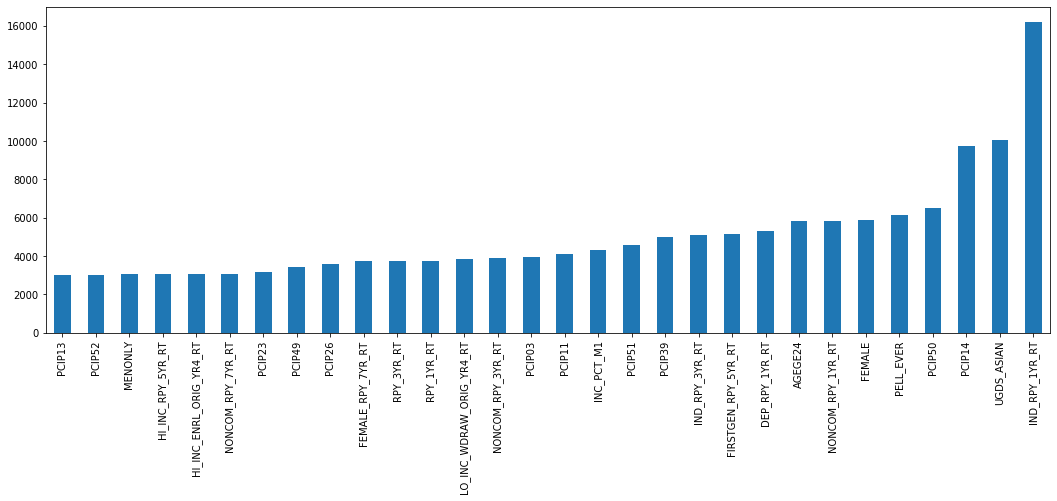

In [401]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(model_best.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

